<H1> 2 Logistic regression on real world data - Breast Cancer Wisconsin Diagnostic</H1>

In [12]:
#import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [13]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes) 
df = breast_cancer_wisconsin_diagnostic.data.features.copy()  # Use .copy() to avoid the warning
df.loc[:, "Diagnosis"] = breast_cancer_wisconsin_diagnostic.data.targets  # Use .loc[] to avoid the warning

print(df.shape)



(569, 31)


In [14]:
print("columns_names : " , df.columns)
diagnosis_categories = df["Diagnosis"].unique()
print("diagnosis_categories", diagnosis_categories)

columns_names :  Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')
diagnosis_categories ['M' 'B']


In [15]:
#Select five features 
selected_features = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1','Diagnosis']
df_filtered = df[selected_features]
print(df_filtered.shape)



(569, 6)


              radius1  texture1  perimeter1     area1  smoothness1
radius1      1.000000  0.323782    0.997855  0.987357     0.170581
texture1     0.323782  1.000000    0.329533  0.321086    -0.023389
perimeter1   0.997855  0.329533    1.000000  0.986507     0.207278
area1        0.987357  0.321086    0.986507  1.000000     0.177028
smoothness1  0.170581 -0.023389    0.207278  0.177028     1.000000


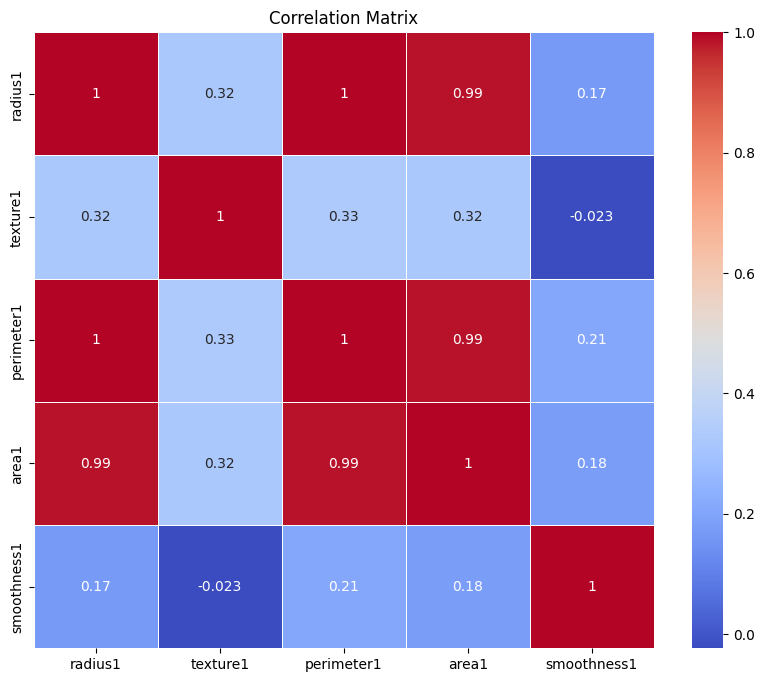

In [16]:
correlation_matrix = df_filtered.drop(columns='Diagnosis').corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


There is clear corelation between the features and the target variable. 

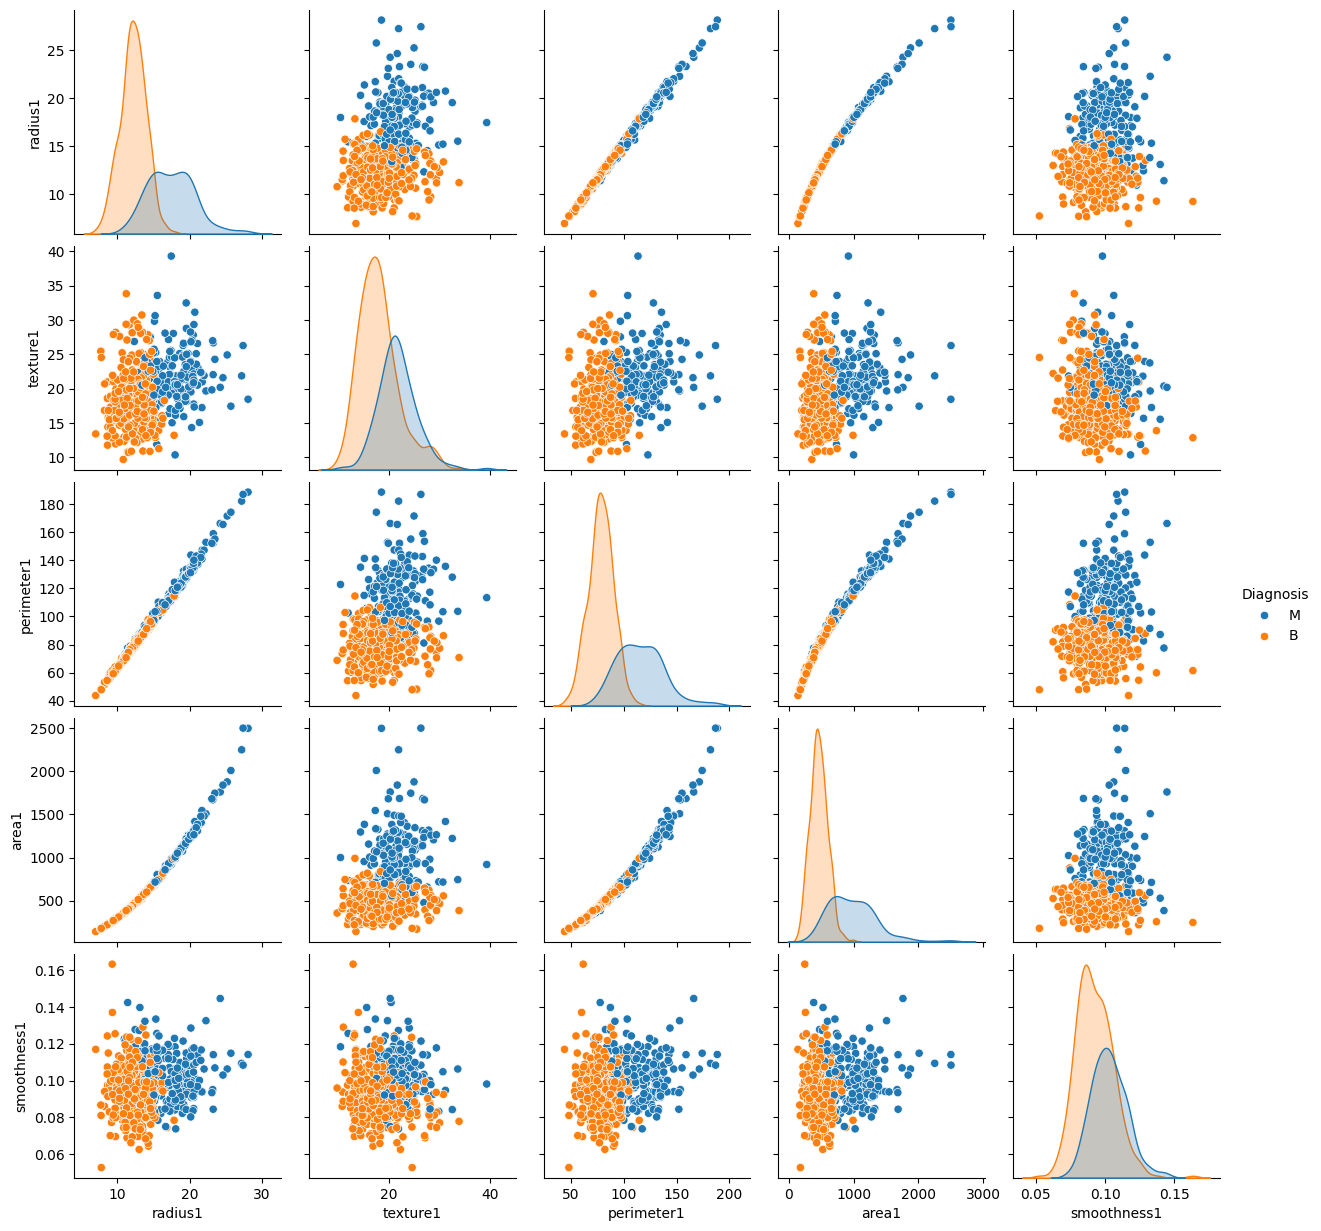

In [17]:
#Create a Seaborn pairplot
sns.pairplot(data=df_filtered, diag_kind='kde', hue='Diagnosis')
plt.show()

###  Correlation Matrix and Pair Plots

The correlation matrix reveals strong relationships between several features. In the pair plots , observed a clear grouping of M and B classes, though they are not perfectly separable. These features are useful for further analysis and classification.


In [18]:
# Initialize the LabelEncoder
le = LabelEncoder()

In [19]:
# Encode the species column
y_encoded = le.fit_transform(df_filtered['Diagnosis'])
df_filtered.loc[:, 'target_encoded'] = y_encoded


C:\Users\Dell\AppData\Local\Temp\ipykernel_4172\1768445828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'target_encoded'] = y_encoded


In [20]:
#Prepare the data
X = df_filtered.drop(columns=["Diagnosis","target_encoded"])  # Independent variables (features)

y = df_filtered["target_encoded"]  


#Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a Logistic Regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)
# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9298245614035088
Precision: 0.9310111026358167
Recall: 0.9298245614035088
F1-Score: 0.9301207564365458
Confusion Matrix:
 [[66  5]
 [ 3 40]]


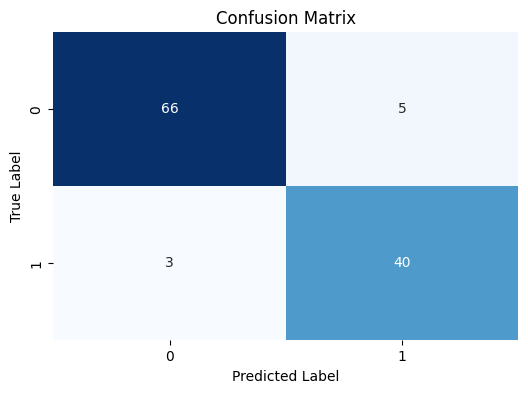

In [21]:
# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display the plot
plt.show()

In [22]:
import statsmodels.api as sm



# Step 2: Add a constant term to the model (for intercept)
X = sm.add_constant(X)

# Step 3: Fit the logistic regression model using statsmodels.Logit
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Step 4: Get the summary of the model
print(result.summary())

# Step 5: Interpret p-values from the summary


Optimization terminated successfully.


         Current function value: 0.148702
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         target_encoded   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.7748
Time:                        14:32:13   Log-Likelihood:                -84.612
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.406e-123
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.5262      8.386     -1.494      0.135     -28.962       3.909
radius1        -6.2753      1.836     -3.418      0.001      -

### Logit Regression and Feature Selection

The p-values for all predictors are below the significance threshold (p < 0.05), except for the constant term. This suggests that all features (radius1, texture1, perimeter1, area1, smoothness1) are statistically significant and should not be discarded.

However, the model indicates quasi-separation, meaning a subset of the data is perfectly separable, which may affect the reliability of the results.
